Eduardo da Silva dos Santos 22886295
Victor de Melo Roston 22006737

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from torchvision import transforms
import time
import kagglehub
import shutil

# Baixar arquivos

In [5]:
# Baixamos o dataset na mão mesmo

# Visualização do dataset

In [6]:
train_dir = 'RiceLeafs/train'

class_counts = {}
class_folders = os.listdir(train_dir)

## Antes de aplicar data augmentation

/tmp/ipykernel_9494/1161972695.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette='viridis')


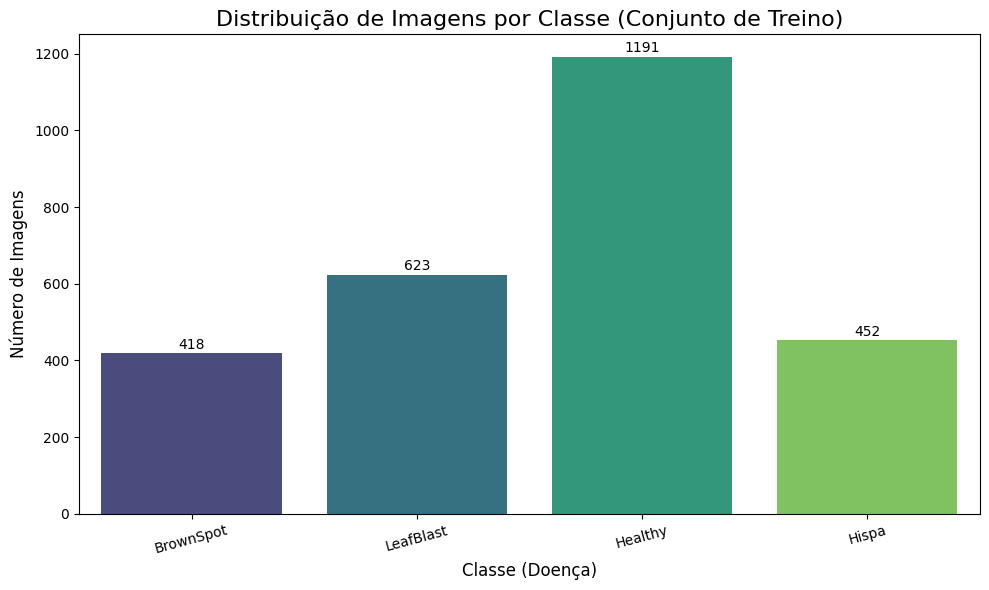

In [7]:
for class_name in class_folders:
    class_path = os.path.join(train_dir, class_name)
    
    num_images = len(os.listdir(class_path))
    
    class_counts[class_name] = num_images


classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))

sns.barplot(x=classes, y=counts, palette='viridis')

for index, value in enumerate(counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribuição de Imagens por Classe (Conjunto de Treino)', fontsize=16)
plt.xlabel('Classe (Doença)', fontsize=12)
plt.ylabel('Número de Imagens', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

## Data Augmentation 

In [8]:
target = 1000

augmentations = transforms.Compose([
    transforms.RandomChoice([
        transforms.RandomRotation((0, 0)),                                       # Não gira (0 graus)
        transforms.RandomRotation((90, 90)),                                     # Gira exatamente 90 graus
        transforms.RandomRotation((180, 180)),                                   # Gira exatamente 180 graus
        transforms.RandomRotation((270, 270))                                    # Gira exatamente 270 graus
    ]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
])

for class_name in class_folders:
    class_path = os.path.join(train_dir, class_name)
    
    current_count = len(os.listdir(class_path))
    
    while current_count < target:
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        
        image = Image.open(img_path).convert('RGB')

        augmented_image = augmentations(image)
        
        new_img_name = f'aug_{current_count}_{img_name}'
        new_img_path = os.path.join(class_path, new_img_name)
        
        augmented_image.save(new_img_path)
        
        current_count += 1

## Após aplicar data augmentation

/tmp/ipykernel_9494/1161972695.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette='viridis')


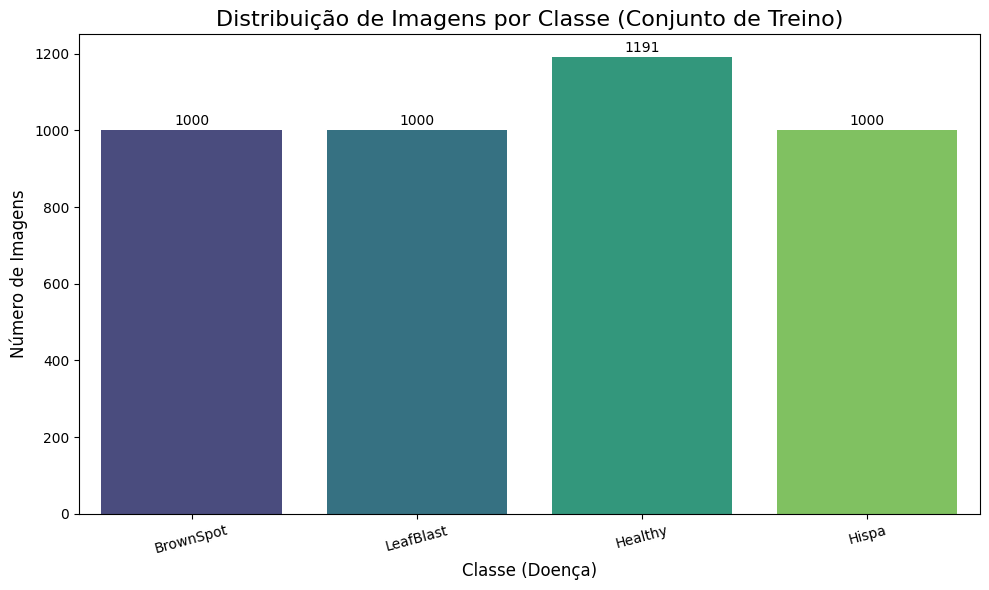

In [9]:
for class_name in class_folders:
    class_path = os.path.join(train_dir, class_name)
    
    num_images = len(os.listdir(class_path))
    
    class_counts[class_name] = num_images


classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))

sns.barplot(x=classes, y=counts, palette='viridis')

for index, value in enumerate(counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribuição de Imagens por Classe (Conjunto de Treino)', fontsize=16)
plt.xlabel('Classe (Doença)', fontsize=12)
plt.ylabel('Número de Imagens', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()